# Credit Card Fraud Detection

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\danig\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score, average_precision_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## <ins>Exploratory Data Analysis</ins>

In [5]:
df = pd.read_csv(path+'/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
y = df['Class'] 
X = df.drop(['Class', 'Time'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8, shuffle=True, stratify=df['Class'])

### Class Imbalance

In [5]:
fraud = 0
not_fraud = 0
for i in y:
  if i == 1:
    fraud = fraud+1
  else:
    not_fraud = not_fraud+1

print("Not Fraud:", not_fraud, "->", round(not_fraud/len(y)*100, 2), "%")
print("Fraud:", fraud, "->", round((fraud)/len(y)*100, 2), "%")

Not Fraud: 284315 -> 99.83 %
Fraud: 492 -> 0.17 %


Com es pot observar el dataset està molt imbalancejat, per tant, no ho avaluarem amb 'accuracy' ... 
*TODO: Explicar la metrica a utilizar*

### Valors NaN

In [6]:
df.isnull().values.any()

np.False_

Aquest dataset no te Nans, per tant, no requereix un tractament d'aquests.

### Correlació

<Axes: >

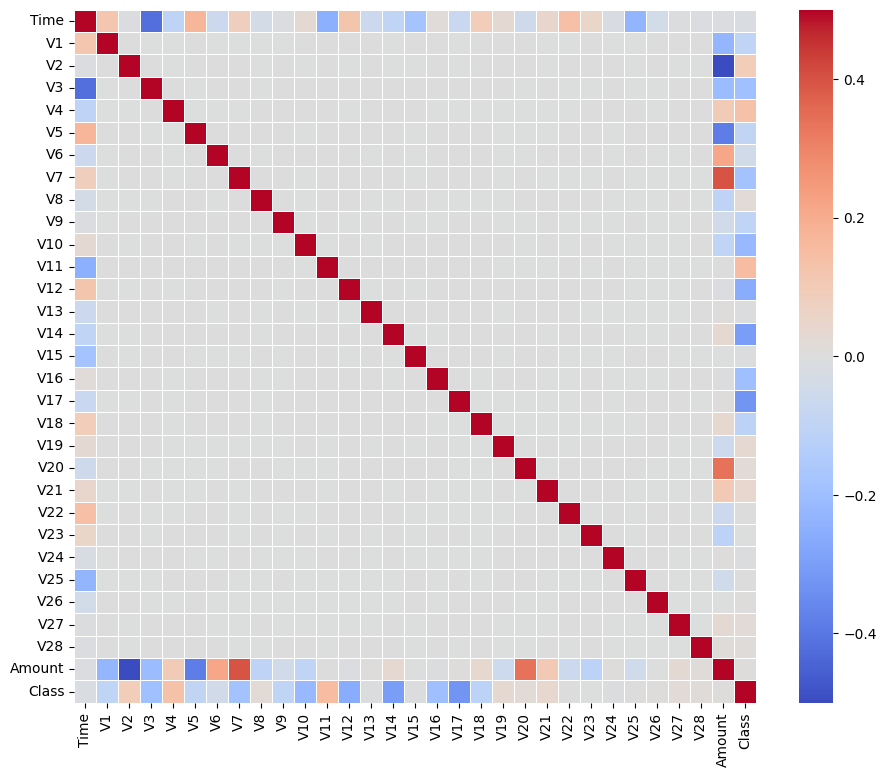

In [7]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df.corr(), center=0, cmap='coolwarm', linewidths=.5, vmax=0.5, vmin=-0.5)

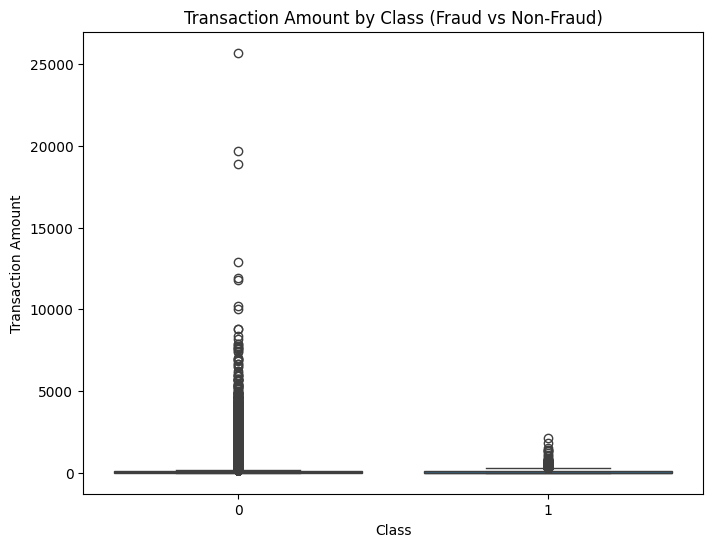

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

## <ins>Preprocessing</ins>

In [9]:
df['Amount'] = RobustScaler().fit_transform(df['Amount'].to_numpy().reshape(-1,1))
df['Amount']

0         1.783274
1        -0.269825
2         4.983721
3         1.418291
4         0.670579
            ...   
284802   -0.296653
284803    0.038986
284804    0.641096
284805   -0.167680
284806    2.724796
Name: Amount, Length: 284807, dtype: float64

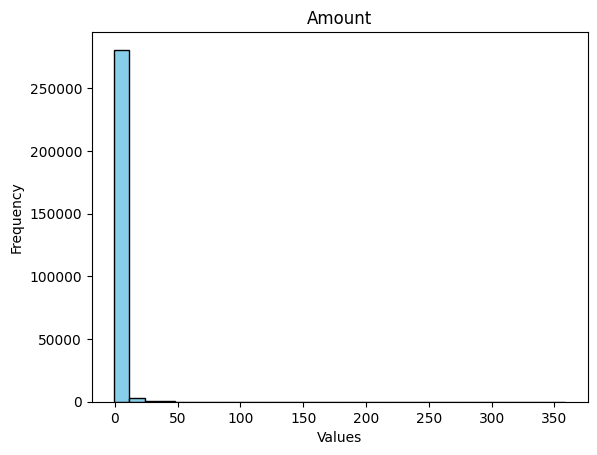

In [10]:
plt.hist(df['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Amount')

plt.show()

### Metrics

In [16]:
def get_classification_report(y, pred):
    return classification_report(y, pred)

def get_f1_score(y, pred):
    return f1_score(y, pred)

### Logistic Regression

In [26]:
start = time.time()
log_reg = LogisticRegression(max_iter= 50000, random_state = 1).fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

log_reg_pred = log_reg.predict(X_test)
print("F1-Score:", get_f1_score(y_test, log_reg_pred))
print(get_classification_report(y_test, log_reg_pred))

Time: 8.999192237854004
F1-Score: 0.7727272727272727
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.69      0.77        98

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



### KNN

KNN requereix normalització de les dades pper funcionar correctament, per tant guardarem les dades normalitzades a una altre variable que només utilitzarem a KNN.

In [108]:
scaler_train = MinMaxScaler()
scaler_train.fit(X_train)
X_train_n = scaler_train.fit_transform(X_train)

scaler_test = MinMaxScaler()
scaler_test.fit(X_test)
X_test_n = scaler_test.fit_transform(X_test)

In [109]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_n, y_train)
end = time.time()
print("Time:", end - start)

knn_pred = knn.predict(X_test_n)
print("F1-Score:", get_f1_score(y_test, knn_pred))
print(get_classification_report(y_test, knn_pred))

Time: 0.04739665985107422
F1-Score: 0.7142857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.56      0.71        98

    accuracy                           1.00     56962
   macro avg       0.99      0.78      0.86     56962
weighted avg       1.00      1.00      1.00     56962



KNN amb 5 n_neighbours te un 6% menys de F1-score però és molt ràpid, aquest model l'utilitzaré per fer Cross-Validation i optimitzar els seus hiperparàmetres, per veure si es pot arribar a superar als altres models.

### SVC

In [28]:
start = time.time()
svm = SVC(kernel='sigmoid').fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

svm_pred = svm.predict(X_test)
print("F1-Score:", get_f1_score(y_test, svm_pred))
print(get_classification_report(y_test, svm_pred))

Time: 8.826568603515625
F1-Score: 0.06578947368421052
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.09      0.05      0.07        98

    accuracy                           1.00     56962
   macro avg       0.55      0.53      0.53     56962
weighted avg       1.00      1.00      1.00     56962



SVC amb un kernel sigmoidal té un F1-score pèssim i a sobre triga bastant temps, no el tindré en compte per a cross-validation, quan faci undersampling, al haber-hi menys dades tornaré a considerar-ho ja que no trigarà tant i així comprobaré si el motiu d'aquuesta puntuació es degut a l'imbalanceig a les dades.

In [29]:
start = time.time()
linear_svm = LinearSVC().fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

linear_svm_pred = linear_svm.predict(X_test)
print("F1-Score:", get_f1_score(y_test, linear_svm_pred))
print(get_classification_report(y_test, linear_svm_pred))

Time: 2.3151235580444336
F1-Score: 0.7976878612716763
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



SVC linear en canvi té un F1-score superior a Logistic Regression i KNN, tot i que no es tan ràpid com KNN si que obtenim suficient bons resultats com per utilitzar-ho per cross-validation i optimitzar els seus hiperparàmetres per obtenir el millor resultat possible.

### Decision Tree

In [113]:
start = time.time()
dtc = DecisionTreeClassifier(max_depth= 6).fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

dtc_pred = dtc.predict(X_test)
print("F1-Score:", get_f1_score(y_test, dtc_pred))
print(get_classification_report(y_test, dtc_pred))

Time: 6.476154088973999
F1-Score: 0.8465608465608465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Tot i que obtenim millors resultats que amb SVC linear, triga molt més temps en entrenar, aquest model no el tindré en compte per a Oversampling, ja que al haber-hi més dades trigarà encara més.
Si no indico max_depth, triga 20s en comptes dels 11 que triga amb max_depth=10.

### Random Forest

In [114]:
start = time.time()
rf = RandomForestClassifier(max_depth= 6, n_jobs=-1).fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

rf_pred = rf.predict(X_test)
print("F1-Score:", get_f1_score(y_test, rf_pred))
print(get_classification_report(y_test, rf_pred))

Time: 14.267889022827148
F1-Score: 0.8743169398907104
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Tot i que Random Forest es el millor model fins ara, es molt lent com per considerar-ho per fer cross-validation. Quan apliqui undersampling al haber-hi moltes menys entrades aquest inconvenient del temps no serà tant significatiu i ho tornaré a considerar, però quan apliqui Oversampling n'hi haurà encara més dades que ara i anirà encara més lent, per aquest motiu no el tindré en compte.

### XGB

In [32]:
start = time.time()
xgb = XGBClassifier(n_jobs=-1).fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))
print(get_classification_report(y_test, xgb_pred))

Time: 1.4220654964447021
F1-Score: 0.8877005347593583
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.85      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



XGB té el millor resultat fins ara, molt similar a l'obtingut amb random forest però sent 6 vegades més ràpid. Si només pugués utilitzar un model a partir d'ara aquest sería el que escolliria basant-me en aquest resultat.

### Cross-Validation

In [115]:
log_reg_cv = cross_val_score(log_reg, X_train, y_train, scoring="f1", cv = 5)
knn_cv = cross_val_score(knn, X_train_n, y_train, scoring="f1", cv = 5)
linear_svm_cv = cross_val_score(linear_svm, X_train, y_train, scoring="f1", cv = 5)
dtc_cv = cross_val_score(dtc, X_train, y_train, scoring="f1", cv = 5)
xgb_cv = cross_val_score(xgb, X_train, y_train, scoring="f1", cv = 5)

print("Logistic Regression - Mean:", log_reg_cv.mean(), "STD:", log_reg_cv.std())
print("KNN - Mean:", knn_cv.mean(), "STD:", knn_cv.std())
print("Linear SVC - Mean:", linear_svm_cv.mean(), "STD:", linear_svm_cv.std())
print("Decision Tree - Mean:", dtc_cv.mean(), "STD:", dtc_cv.std())
print("XGB - Mean:", xgb_cv.mean(), "STD:", xgb_cv.std())

Logistic Regression - Mean: 0.7006029725067789 STD: 0.06075303607619582
KNN - Mean: 0.839370850360965 STD: 0.0431805909385037
Linear SVC - Mean: 0.6750636878990666 STD: 0.058788002430346625
Decision Tree - Mean: 0.812146375791696 STD: 0.02653946245723401
XGB - Mean: 0.858393121753721 STD: 0.035584629334951684


Podem observar amb aquests resultats de cross-validation que el millor model i el més consistent amb els paràmetres utilitzats es XGB seguit de KNN.

Tot i que KNN té un molt bon resultat, succeix per overfitting, ja que la predicció al test només era de 71%.

Ara utilitzaré Cross-Validation per probar diferents hiperàrametres per al model XGB per veuré si es pot millorar. Només utilitzaré aquest model ja que es el que millor puntuació ha obtingut i triga considerablement menys que Decision Tree

No faré hyper-parameter tuning the Decision tree tot i que te bastant bó F1-score perqué es molt lent, aquest model el probaré amb undersampling quan n'hi hagi menys dades.

### Hyper-Parameter Tuning

#### <ins>XGB</ins>

In [91]:
param_grid = {
    'min_split_loss': [0, 5, 10],
    'max_delta_step': [0, 3, 8],
    'learning_rate': [0.1, 0.3, 0.5]
}

start = time.time()

xgb_ht = XGBClassifier(n_jobs=-1)
grid_search = GridSearchCV(xgb_ht, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

end = time.time()
print("Time:", end - start)

print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Time: 114.45568013191223
Best set of hyperparameters:  {'learning_rate': 0.1, 'max_delta_step': 0, 'min_split_loss': 0}
Best score:  1.0


In [92]:
start = time.time()
xgb_best = XGBClassifier(n_jobs=-1, max_delta_step=0, learning_rate=0.1, min_split_loss=0).fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))
print(get_classification_report(y_test, xgb_pred))

Time: 0.863804817199707
F1-Score: 0.7926267281105991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.88      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## <ins>Undersample</ins>

Text(0.5, 1.0, 'After')

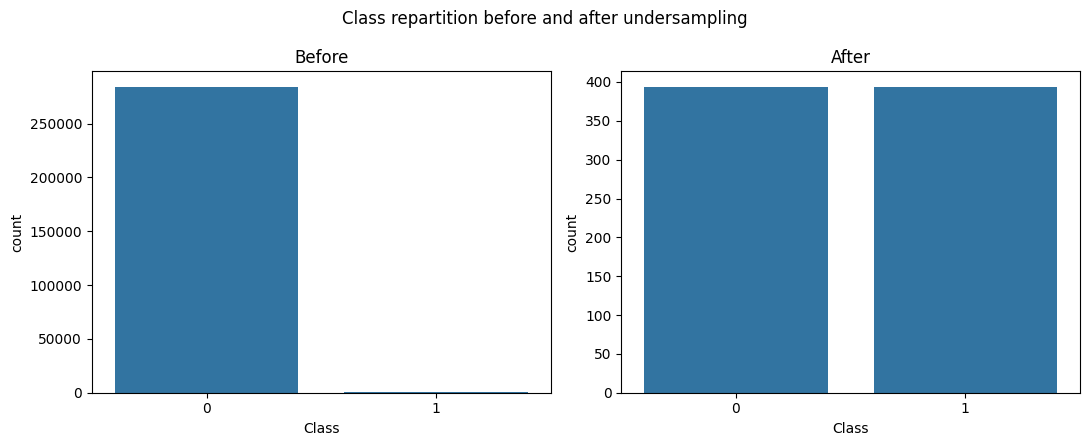

In [119]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler()

X_under, y_under = undersample.fit_resample(X_train, y_train)

y_under_df = pd.DataFrame(y_under, columns = ['Class'])

#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(11,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=y_under_df, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

### Cross-Validation

In [144]:
log_reg_cv = cross_val_score(log_reg, X_under, y_under, scoring="f1", cv = 5)
knn_cv = cross_val_score(knn, X_under_n, y_under, scoring="f1", cv = 5)
linear_svm_cv = cross_val_score(linear_svm, X_under, y_under, scoring="f1", cv = 5)
dtc_cv = cross_val_score(dtc, X_under, y_under, scoring="f1", cv = 5)
xgb_cv = cross_val_score(xgb, X_under, y_under, scoring="f1", cv = 5)

print("Logistic Regression - Mean:", log_reg_cv.mean(), "STD:", log_reg_cv.std())
print("KNN - Mean:", knn_cv.mean(), "STD:", knn_cv.std())
print("Linear SVC - Mean:", linear_svm_cv.mean(), "STD:", linear_svm_cv.std())
print("Decision Tree - Mean:", dtc_cv.mean(), "STD:", dtc_cv.std())
print("XGB - Mean:", xgb_cv.mean(), "STD:", xgb_cv.std())

Logistic Regression - Mean: 0.9355423803814482 STD: 0.03720117726046531
KNN - Mean: 0.920803398862876 STD: 0.016589956397891875
Linear SVC - Mean: 0.9355763333565775 STD: 0.03809651700425594
Decision Tree - Mean: 0.9112608273857503 STD: 0.03237703320847673
XGB - Mean: 0.9355847365301191 STD: 0.021315649243782136


Es pot observar que les puntuacions són molt millers que abans de fer undersampling, però anem a evaluar amb el test per veure si es tracta d'overfitting.

### Logistic Regression

In [121]:
log_reg = LogisticRegression(max_iter= 50000, random_state = 1).fit(X_under, y_under)
test_pred = log_reg.predict(X_test)

print("Classification Report:", get_classification_report(y_test, test_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



### KNN

In [123]:
scaler_train = MinMaxScaler()
scaler_train.fit(X_under)
X_under_n = scaler_train.fit_transform(X_under)

In [124]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5).fit(X_under_n, y_under)
end = time.time()
print("Time:", end - start)

knn_pred = knn.predict(X_test_n)
print("F1-Score:", get_f1_score(y_test, knn_pred))
print(get_classification_report(y_test, knn_pred))

Time: 0.001508951187133789
F1-Score: 0.0034634482514887526
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.01     56962
   macro avg       0.50      0.50      0.01     56962
weighted avg       1.00      0.01      0.02     56962



### Support Vector Machine Classification

In [128]:
start = time.time()
linear_svm = LinearSVC().fit(X_under, y_under)
end = time.time()
print("Time:", end - start)

linear_svm_pred = linear_svm.predict(X_test)
print("F1-Score:", get_f1_score(y_test, linear_svm_pred))
print(get_classification_report(y_test, linear_svm_pred))

Time: 0.015668392181396484
F1-Score: 0.09900990099009901
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



### Decision Tree Classifier

In [130]:
start = time.time()
dtc = DecisionTreeClassifier(max_depth= 6).fit(X_under, y_under)
end = time.time()
print("Time:", end - start)

dtc_pred = dtc.predict(X_test)
print("F1-Score:", get_f1_score(y_test, dtc_pred))
print(get_classification_report(y_test, dtc_pred))

Time: 0.01577305793762207
F1-Score: 0.05338932213557288
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.91      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962



### Random Forest

In [131]:
start = time.time()
rf = RandomForestClassifier(max_depth= 6, n_jobs=-1).fit(X_under, y_under)
end = time.time()
print("Time:", end - start)

rf_pred = rf.predict(X_test)
print("F1-Score:", get_f1_score(y_test, rf_pred))
print(get_classification_report(y_test, rf_pred))

Time: 0.18438410758972168
F1-Score: 0.1488833746898263
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.92      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



### XGB

In [132]:
start = time.time()
xgb = XGBClassifier(n_jobs=-1).fit(X_under, y_under)
end = time.time()
print("Time:", end - start)

xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))
print(get_classification_report(y_test, xgb_pred))

Time: 0.1254127025604248
F1-Score: 0.0794816414686825
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.94      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



Les prediccions al test son molt dolentes, per tant, es tracta d'overfitting.

## <ins>Oversample</ins>

Text(0.5, 1.0, 'After')

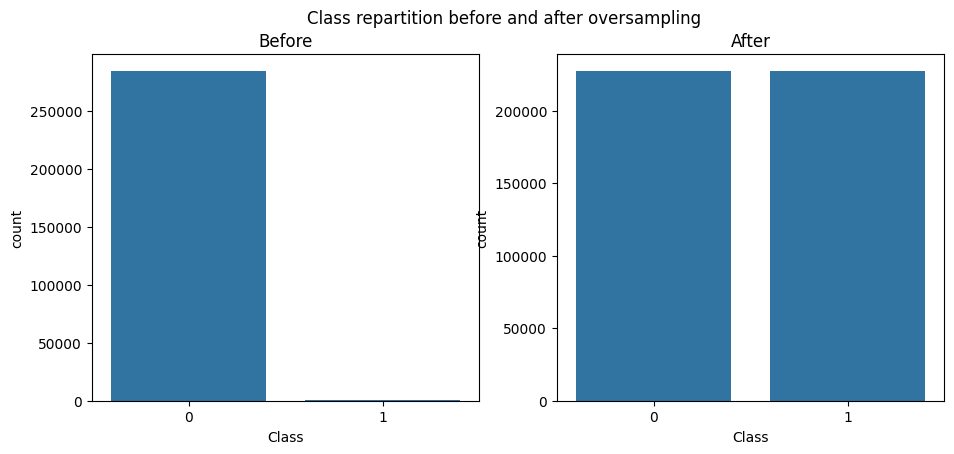

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train, y_train)

y_over_df = pd.DataFrame(y_over, columns = ['Class'])

#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(11,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=y_over_df, ax=axs[1])

fig.suptitle("Class repartition before and after oversampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

### Cross-Validation

In [8]:
new_df = X_train
new_df['Class'] = y_train
folds = np.array_split(new_df, 5)

C:\Users\danig\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
import copy

def cross_val(folds, max_depth=6, gamma=0, eta=0.3):
    best_f1 = 0
    best_model = None
    f1_mean = 0
    
    for i, df_i in enumerate(folds):
        test = df_i
        emptyTrain = True
        for j, df_j in enumerate(folds):
            if i == j:
                continue            
            if emptyTrain:
                train = df_j
                emptyTrain = False
            else:
                train = pd.concat([train, df_j])
    
        k_y_train = train['Class']
        k_X_train = train.drop(['Class'], axis=1)
    
        k_y_test = test['Class']
        k_X_test = test.drop(['Class'], axis=1)
        
        smote = SMOTE(sampling_strategy='minority')
        X_over, y_over = smote.fit_resample(k_X_train, k_y_train)
            
        start = time.time()
        xgb = XGBClassifier(n_jobs=-1, max_depth=max_depth, min_split_loss=gamma, learning_rate=eta).fit(X_over, y_over)
        xgb_pred = xgb.predict(k_X_test)
        f1 = get_f1_score(k_y_test, xgb_pred)
        end = time.time()
            
        if f1 > best_f1:
            best_f1 = f1
            best_model = copy.deepcopy(xgb)
        
        f1_mean += f1
    
    f1_mean = f1_mean / 5
    return f1_mean, best_f1, best_model

In [19]:
f1_mean, best_f1, best_model = cross_val(folds)
print("----- Results -----")
print("Mean:", f1_mean)
print("Best:", best_f1)

----- Results -----
Mean: 0.8151784606961863
Best: 0.8539325842696629


In [22]:
best_pred = best_model.predict(X_test)
print("F1 Score:", get_f1_score(y_test, best_pred))

F1 Score: 0.8269230769230769


In [23]:
start = time.time()
xgb = XGBClassifier(n_jobs=-1).fit(X_over, y_over)
end = time.time()
print("Time:", end - start)

xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))
print(get_classification_report(y_test, xgb_pred))

Time: 2.7308237552642822
F1-Score: 0.8301886792452831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.90      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.95      0.91     56962
weighted avg       1.00      1.00      1.00     56962



### Hyper-Parameter Tuning

#### <ins>Max-Depth</ins>

In [24]:
f1_mean_4, f1_best_4, best_model_4  = cross_val(folds, 4)
f1_mean_6, f1_best_6, best_model_6  = cross_val(folds, 6)
f1_mean_8, f1_best_8, best_model_8  = cross_val(folds, 8)

In [31]:
f1_mean_10, f1_best_10, best_model_10  = cross_val(folds, 10)
f1_mean_12, f1_best_14, best_model_12  = cross_val(folds, 12)
f1_mean_14, f1_best_14, best_model_14  = cross_val(folds, 14)

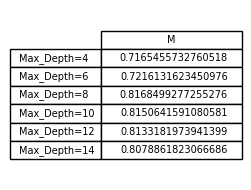

In [32]:
plt.rcParams["figure.figsize"] = [3, 2]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
data = [[str(f1_mean_4)],
        [str(f1_mean_6)],
        [str(f1_mean_8)],
        [str(f1_mean_10)],
        [str(f1_mean_12)],
        [str(f1_mean_14)]]
columns = ('Mean')
rows= ('Max_Depth=4', 'Max_Depth=6', 'Max_Depth=8', 'Max_Depth=10', 'Max_Depth=12', 'Max_Depth=14')
axs.axis('tight')
axs.axis('off')
the_table = axs.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center')
plt.show()

In [26]:
print('Max Depth 4')
xgb = XGBClassifier(n_jobs=-1, max_depth=4).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('Max Depth 6')
xgb = XGBClassifier(n_jobs=-1, max_depth=6).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('Max Depth 8')
xgb = XGBClassifier(n_jobs=-1, max_depth=8).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('Max Depth 10')
xgb = XGBClassifier(n_jobs=-1, max_depth=10).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

Max Depth 4
F1-Score: 0.6872586872586872
Max Depth 6
F1-Score: 0.8301886792452831
Max Depth 8
F1-Score: 0.8309178743961353
Max Depth 10
F1-Score: 0.8390243902439024


In [33]:
print('Max Depth 12')
xgb = XGBClassifier(n_jobs=-1, max_depth=12).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))
print('Max Depth 14')
xgb = XGBClassifier(n_jobs=-1, max_depth=14).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

Max Depth 12
F1-Score: 0.8365384615384616
Max Depth 14
F1-Score: 0.8365384615384616


#### <ins>Gamma</ins>

In [36]:
f1_mean_4, f1_best_4, best_model_4  = cross_val(folds, 10, 0)
f1_mean_6, f1_best_6, best_model_6  = cross_val(folds, 10, 0.1)
f1_mean_8, f1_best_8, best_model_8  = cross_val(folds, 10, 1)

In [37]:
f1_mean_10, f1_best_10, best_model_10  = cross_val(folds, 10, 2)
f1_mean_12, f1_best_12, best_model_12 = cross_val(folds, 10, 4)
f1_mean_14, f1_best_14, best_model_14  = cross_val(folds, 10, 7)

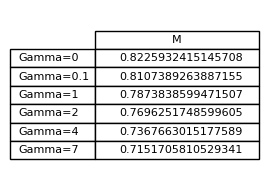

In [38]:
plt.rcParams["figure.figsize"] = [3, 2]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
data = [[str(f1_mean_4)],
        [str(f1_mean_6)],
        [str(f1_mean_8)],
        [str(f1_mean_10)],
        [str(f1_mean_12)],
        [str(f1_mean_14)],]
columns = ('Mean')
rows= ('Gamma=0', 'Gamma=0.1', 'Gamma=1', 'Gamma=2', 'Gamma=4', 'Gamma=7')
axs.axis('tight')
axs.axis('off')
the_table = axs.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center')
plt.show()

In [45]:
print('Gamma = 0')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('Gamma = 0.1')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.1).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('Gamma = 0.5')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.5).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

Gamma = 0
F1-Score: 0.8390243902439024
Gamma = 0.1
F1-Score: 0.8461538461538461
Gamma = 0.5
F1-Score: 0.8380952380952381


#### <ins>Eta</ins>

In [46]:
f1_mean_4, f1_best_4, best_model_4  = cross_val(folds, 10, 0.1, 0.1)
f1_mean_6, f1_best_6, best_model_6  = cross_val(folds, 10, 0.1, 0.3)
f1_mean_8, f1_best_8, best_model_8  = cross_val(folds, 10, 0.1, 0.5)
f1_mean_10, f1_best_10, best_model_10  = cross_val(folds, 10, 0.1, 0.7)
f1_mean_12, f1_best_12, best_model_12  = cross_val(folds, 10, 0.1, 0.9)
f1_mean_14, f1_best_14, best_model_14  = cross_val(folds, 10, 0.1, 1)

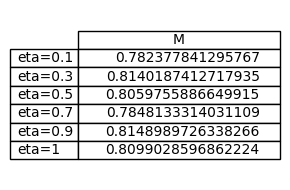

In [47]:
plt.rcParams["figure.figsize"] = [3, 2]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
data = [[str(f1_mean_4)],
        [str(f1_mean_6)],
        [str(f1_mean_8)],
        [str(f1_mean_10)],
        [str(f1_mean_12)],
        [str(f1_mean_14)]]
columns = ('Mean')
rows= ('eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=0.7', 'eta=0.9', 'eta=1')
axs.axis('tight')
axs.axis('off')
the_table = axs.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center')
plt.show()

In [48]:
print('eta = 0.3')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.1, learning_rate=0.3).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('eta = 0.5')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.1, learning_rate=0.5).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('eta = 0.7')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.1, learning_rate=0.7).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

print('eta = 0.9')
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.1, learning_rate=0.9).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

eta = 0.3
F1-Score: 0.8461538461538461
eta = 0.5
F1-Score: 0.8325358851674641
eta = 0.7
F1-Score: 0.8285714285714286
eta = 0.9
F1-Score: 0.7802690582959642


#### <ins>Prediction with best Hyper-Parameters</ins>

In [49]:
f1_mean_best, f1_best_best, best_model_best  = cross_val(folds, 10, 0.1, 0.3)
print("Mean:", f1_mean_best, "Best:", f1_best_best)

Mean: 0.8203539120896727 Best: 0.8589743589743589


In [54]:
xgb = XGBClassifier(n_jobs=-1, max_depth=10, min_split_loss=0.1, learning_rate=0.3).fit(X_over, y_over)
xgb_pred = xgb.predict(X_test)
print("F1-Score:", get_f1_score(y_test, xgb_pred))

F1-Score: 0.8461538461538461
